In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib import cm, colors
from random import randint
from random import sample

In [3]:
data_dir = '../../data_volume/lte_3macro_3Ue_delay_rtt_slow_UMi_ISD500m/'
ue_loc_file = 'mobility_trace.txt'
enb_loc_file = 'gnb_locations.txt'

In [4]:
# pick from a normalized colour map. This results is in the inbetween value being white 
# maybe I need a colourmap that does nto have white
#norm = colors.Normalize(vmin=1, vmax=total_num_cells, clip=True)
#clr_map = cm.ScalarMappable(norm=norm, cmap=cm.hot)

['r', 'b', 'g']


In [5]:
# Specify here topology details from the dataset we are using 
total_num_cells = 3
total_num_ues=3

# When num_rings = 0 
bs_loc = [[0.5, 0.866025], [-1, 1.22465e-16], [0.5, -0.866025]]

# When ISD = 500 m
area_xlim=(-170,170)
area_ylim=(-170,170)

# When ISD = 200 m 
#area_xlim=(-70,70)
#area_ylim=(-70,70)

clr_map=['r','b','g']
print(clr_map)

In [98]:
# When num_rings = 0 
bs_loc = [[0.5, 0.866025, 10], 
              [-1, 1.22465e-16, 10],
              [0.5, -0.866025, 10],
              [433.513, 250.866, 10],
              [432.013, 250, 10],
              [433.513, 249.134, 10],
              [0.5, 500.866, 10],
              [-1, 500, 10],
              [0.5, 499.134, 10],
              [-432.513, 250.866, 10],
              [-434.013, 250, 10],
              [-432.513, 249.134, 10],
              [-432.513, -249.134, 10],
              [-434.013, -250, 10],
              [-432.513, -250.866, 10],
              [0.5, -499.134, 10],
              [-1, -500, 10],
              [0.5, -500.866, 10],
              [433.513, -249.134, 10],
              [432.013, -250, 10],
              [433.513, -250.866, 10]]
# When ISD = 500 m
area_xlim=[-650,650]
area_ylim=[-650,650]

# Creates a list of random colours to use 
clr_map = []
for i in range(total_num_cells):
    clr_map.append('#%06X' % randint(0, 0xFFFFFF))

In [1]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # import data set 

# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [8, 8]

# data 
data = gapminder.loc[gapminder.year == 2007]
print(data)
 
# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

ModuleNotFoundError: No module named 'gapminder'

run3
Number of samples of any UE being associated with each cell
1    570
2    368
3    268
Name: cellId, dtype: int64


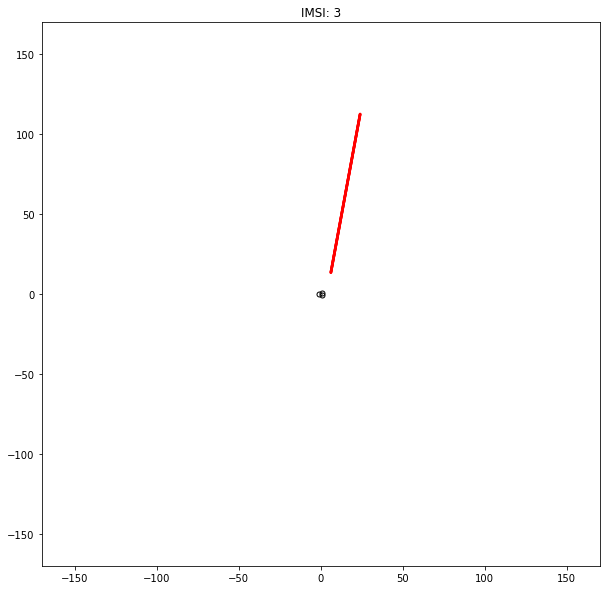

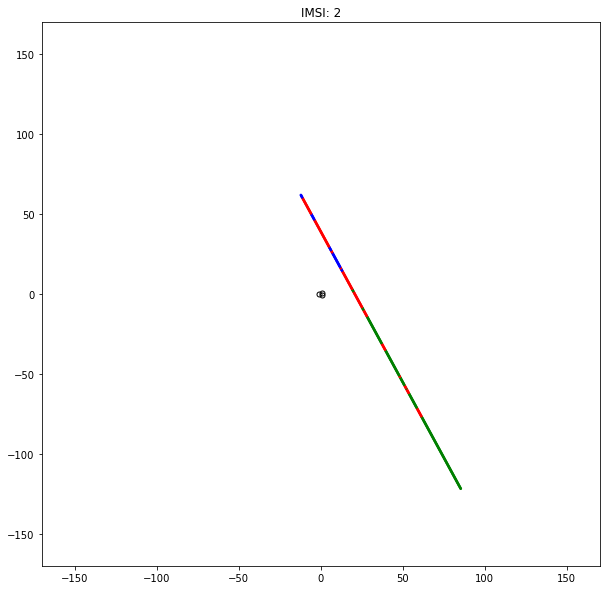

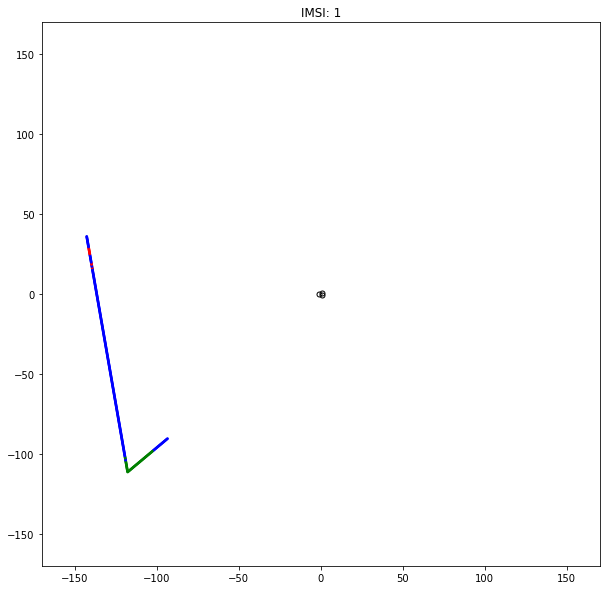

run6
Number of samples of any UE being associated with each cell
3    922
1    270
2     14
Name: cellId, dtype: int64


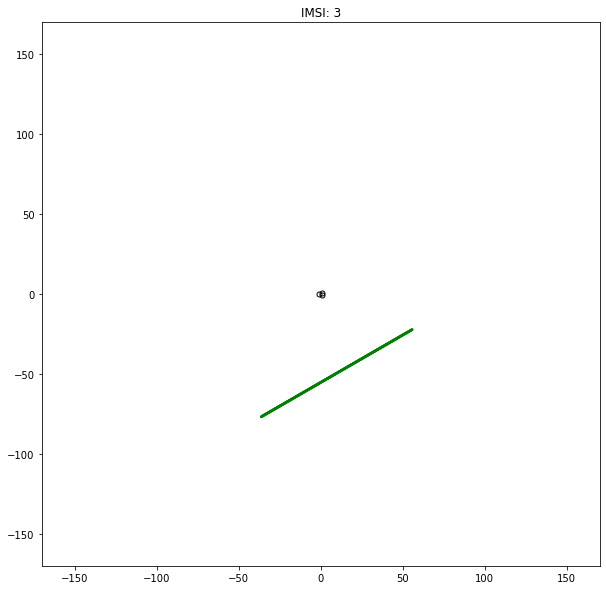

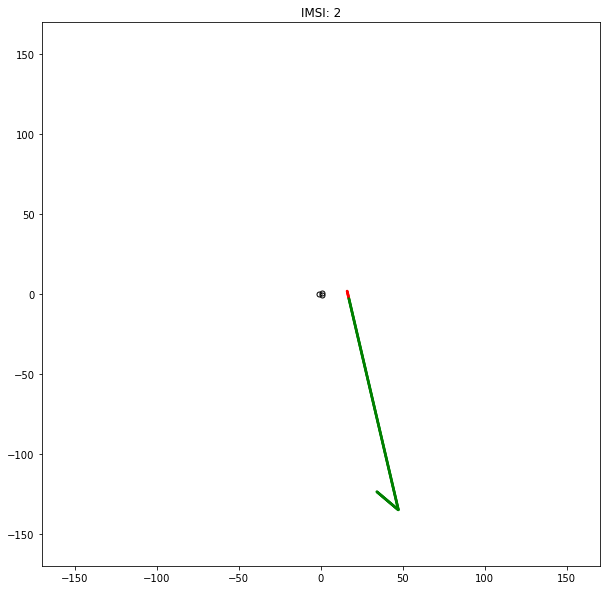

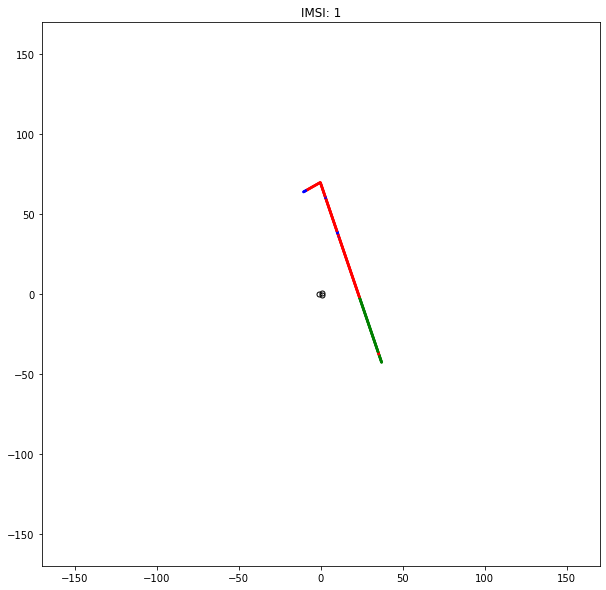

run8
Number of samples of any UE being associated with each cell
1    868
2    183
3    155
Name: cellId, dtype: int64


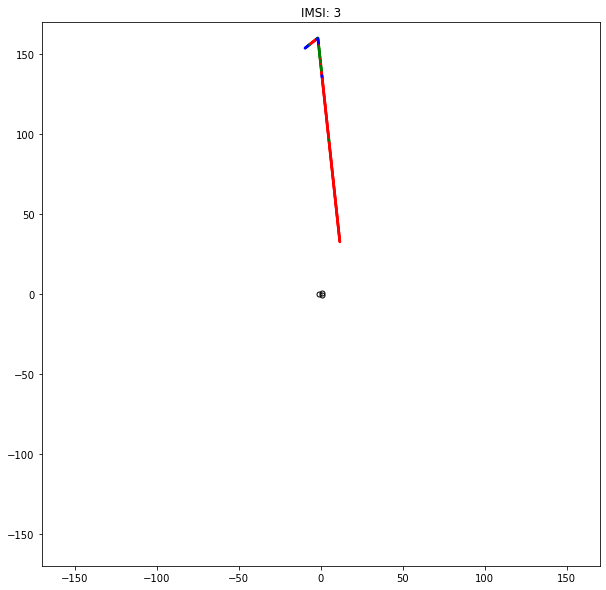

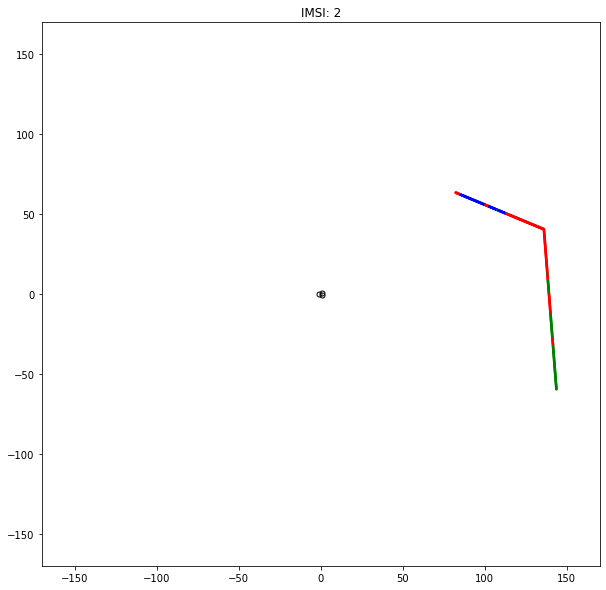

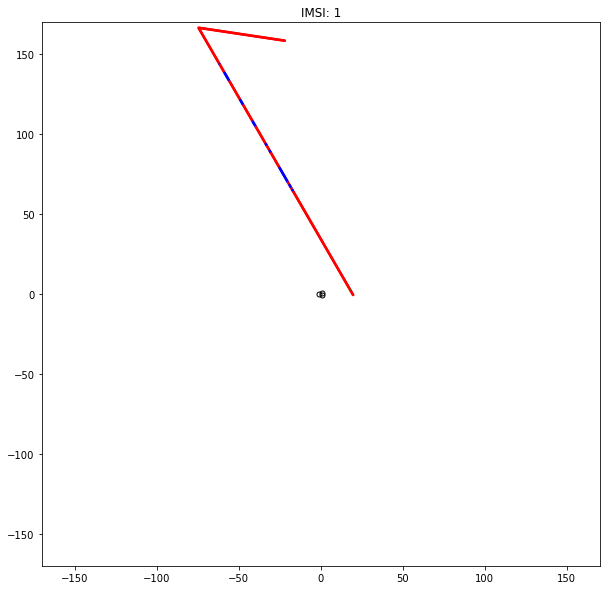

run5
Number of samples of any UE being associated with each cell
1    676
3    471
2     59
Name: cellId, dtype: int64


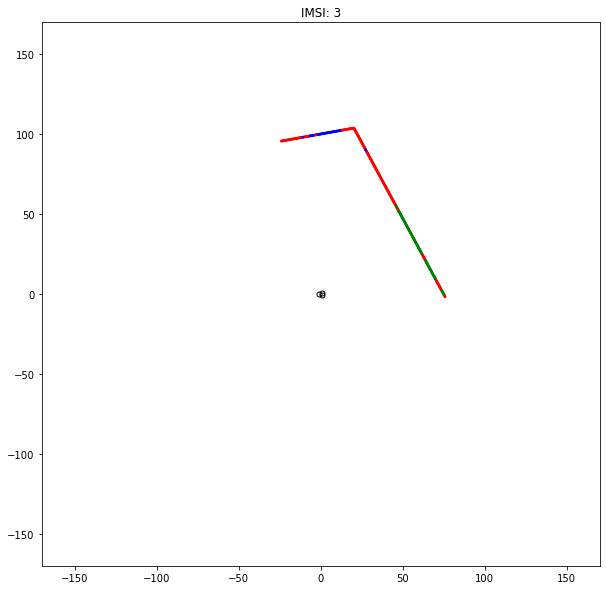

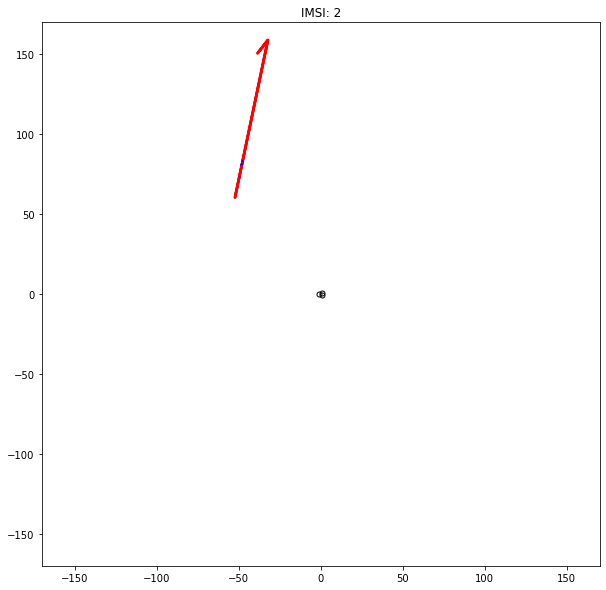

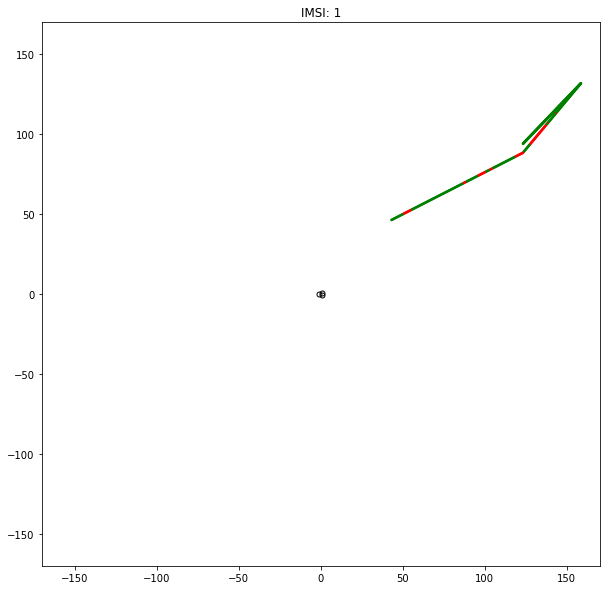

run7
Number of samples of any UE being associated with each cell
3    614
1    592
Name: cellId, dtype: int64


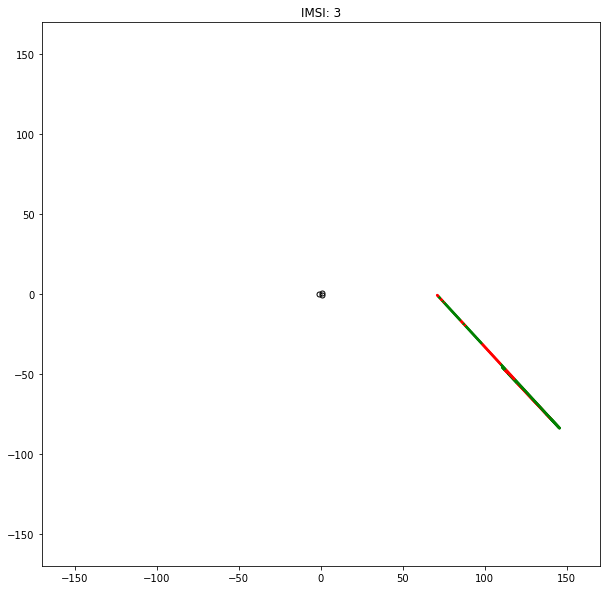

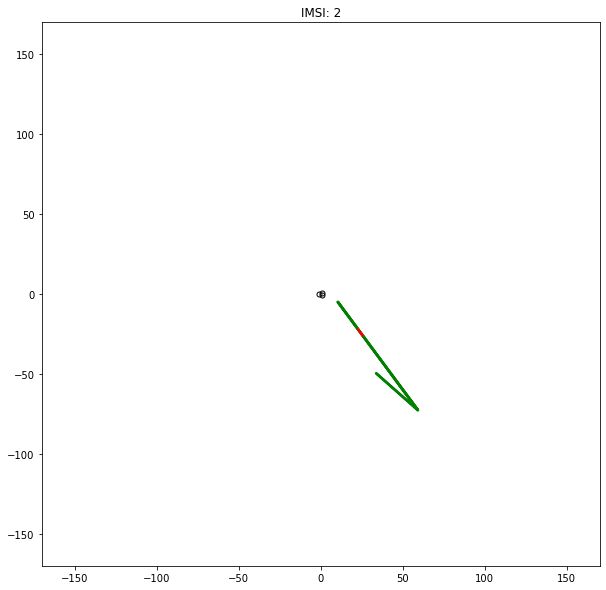

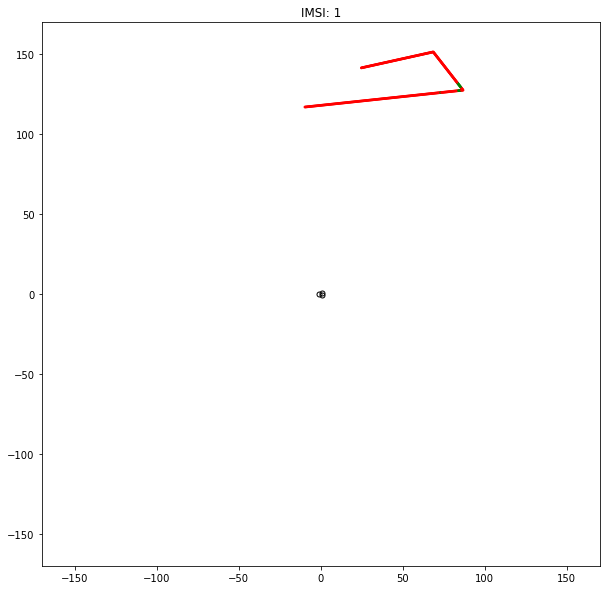

run10
Number of samples of any UE being associated with each cell
2    639
1    429
3    138
Name: cellId, dtype: int64


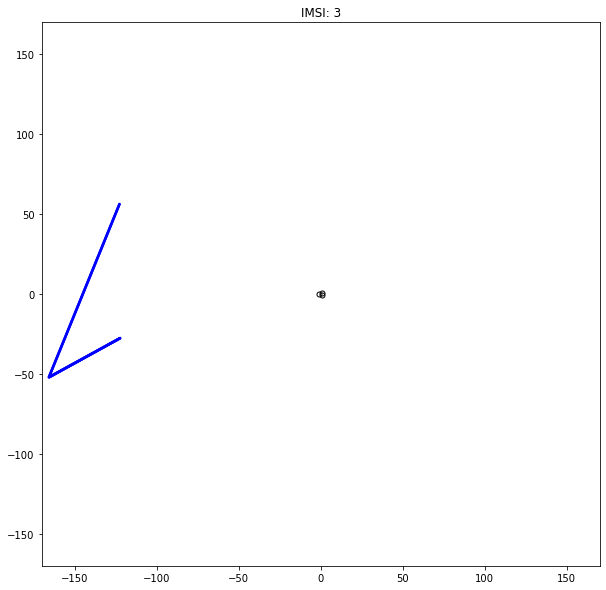

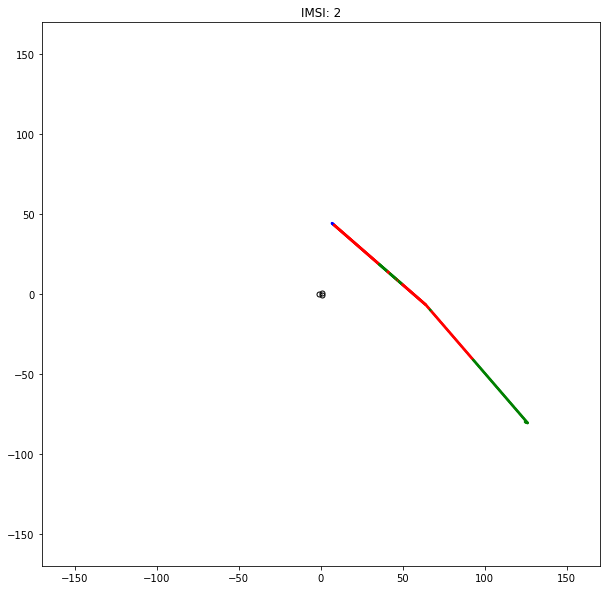

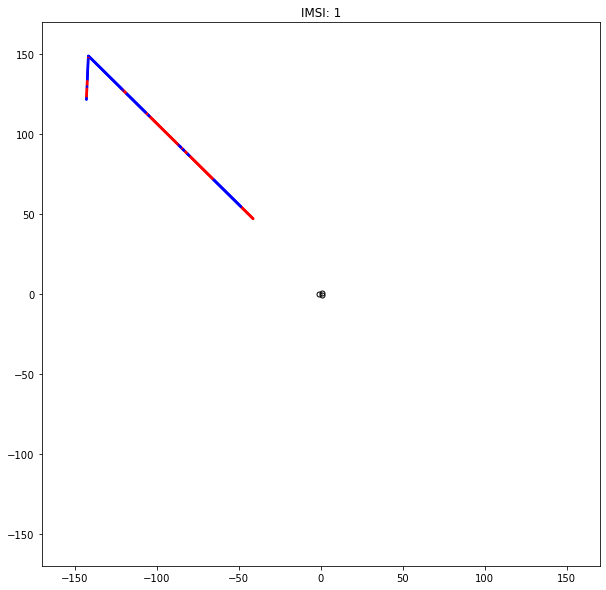

run9
Number of samples of any UE being associated with each cell
2    565
3    379
1    262
Name: cellId, dtype: int64


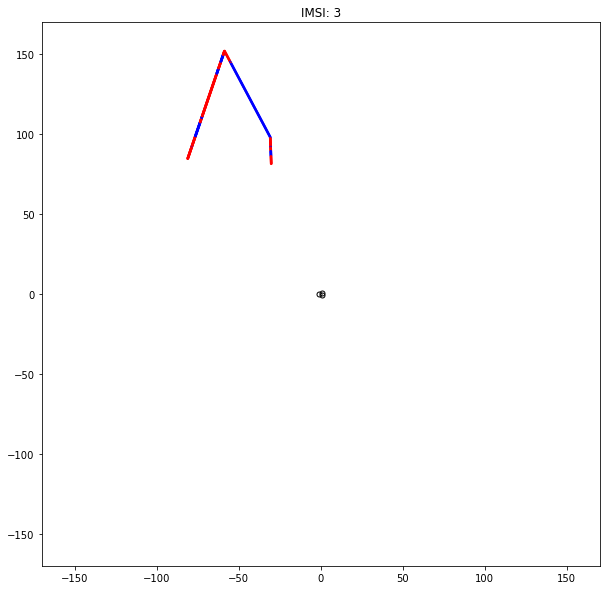

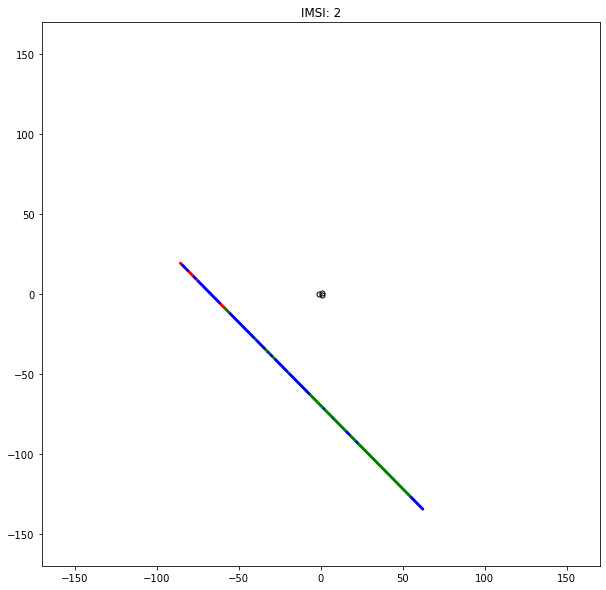

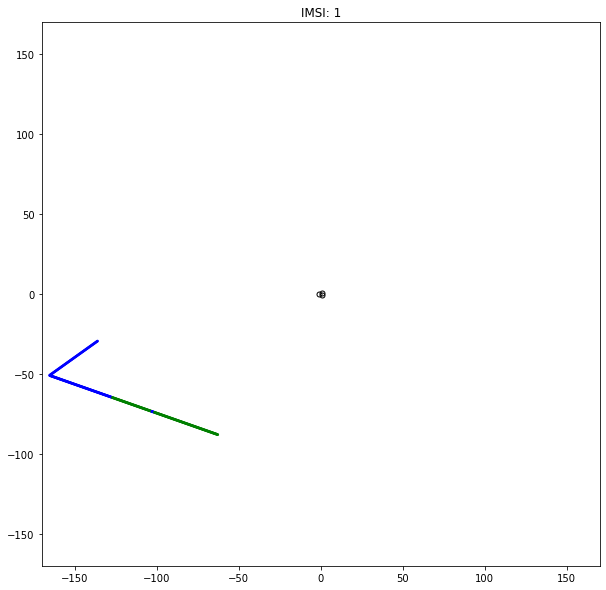

run1
Number of samples of any UE being associated with each cell
2    443
1    409
3    354
Name: cellId, dtype: int64


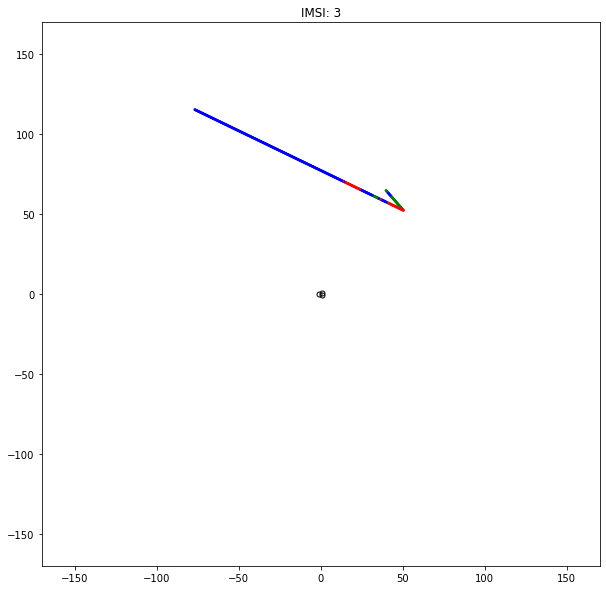

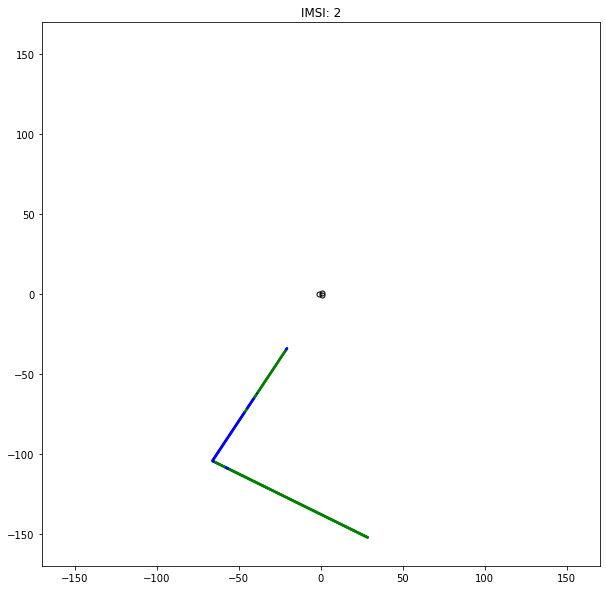

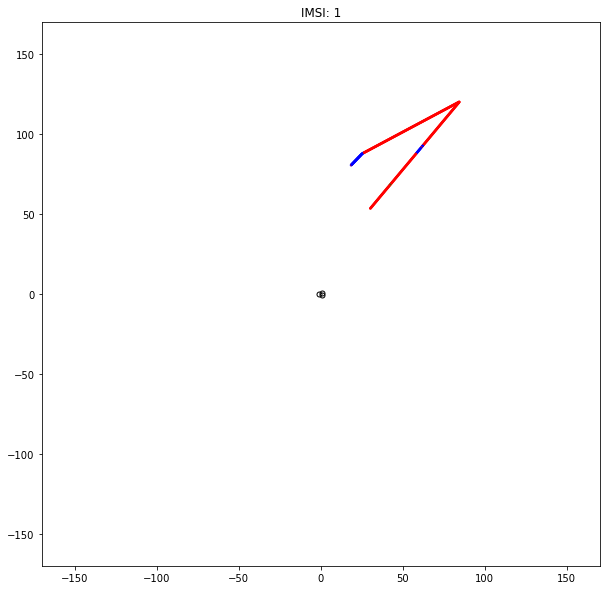

scripts_used_to_gen_this_data


FileNotFoundError: [Errno 2] No such file or directory: '../../data_volume/lte_3macro_3Ue_delay_rtt_slow_UMi_ISD500m/scripts_used_to_gen_this_data/mobility_trace.txt'

In [9]:
bs_locs = pd.read_csv(data_dir+'run1/'+enb_loc_file, sep=',')
bs_cellIds = bs_locs['cellId']
bs_locs = bs_locs[['gnbpos_x', 'gnbpos_y']]
# imsis chosen for plotting 
chosen_imsis=sample(range(1, total_num_ues+1), 3)

#print(bs_locs[['gnbpos_x', 'gnbpos_y']])
for run in os.listdir(data_dir):
#for run in ['run1']:
    print('============================================================')
    print (run)
    print('============================================================')    
    df = pd.read_csv(data_dir+run+'/'+ue_loc_file, sep='\t')
    df_metric = pd.read_csv(data_dir+run+'/'+'UlSinrStats.txt', sep='\t')['sinrLinear']
    
    # number of entries for whih cellId is 0
    print('Number of samples of any UE being associated with each cell')
    print(df['cellId'].value_counts())
    ## Separate by UE
    #for name, df_ue in df.groupby(by=['IMSI']):
    df_ue=df.groupby(by=['IMSI'])
    for imsi in chosen_imsis:
        df_per_imsi=df_ue.get_group(imsi)
        #print(df_per_imsi['cellId'].value_counts())
        colors=[clr_map[cell-1] for cell in df_per_imsi['cellId'].to_numpy()]
        plt.figure(figsize=(10,10))
        plt.scatter(df_per_imsi['pos_x'], df_per_imsi['pos_y'], c=colors, s=3)
        sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=(20, 2000))
        plt.title('IMSI: '+str(imsi))
        plt.xlim(area_xlim)
        plt.ylim(area_ylim)  
        # plot base station locations 
        plt.plot(bs_locs['gnbpos_x'], bs_locs['gnbpos_y'], 'ko', markersize=5, markerfacecolor='none')
        plt.show()